<a href="https://colab.research.google.com/github/EdCsDsIA/TRAB_PRACTICO_MLEARNING/blob/main/REGRESION_LOGISITCA_ACCIDENTES_VIALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABAJO PRÁCTICO SOBRE CLUSTERIZACION:

GRUPO FORMADO POR:

    GIOVINE, CARINA;
    HERRERO RIVERO, EDUARDO;
    ARÉVALO, IVÁN;
    GÓMEZ, OCTAVIO.
    



## El algoritmo k-means

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:

Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.

Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.

Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

Los objetos se representan con vectores reales de d
dimensiones (x1,x2,…,xn) y el algoritmo k-means construye k grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo S={S1,S2,…,Sk}, a su centroide. El problema se puede formular de la siguiente forma:

minSE(μi)=minS∑i=1k∑xj∈Si∥xj−μi∥2(1)

donde S es el conjunto de datos cuyos elementos son los objetos xj representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos k grupos o clusters con su correspondiente centroide μi.

En cada actualización de los centroides, desde el punto de vista matemático, imponemos la condición necesaria de extremo a la función E(μi) que, para la función cuadrática (1) es

∂E∂μi=0⟹μ(t+1)i=1∣∣S(t)i∣∣∑xj∈S(t)ixj

y se toma el promedio de los elementos de cada grupo como nuevo centroide.

Las principales ventajas del método k-means son que es un método sencillo y rápido. Pero es necesario decidir el valor de k y el resultado final depende de la inicialización de los centroides. En principio no converge al mínimo global sino a un mínimo local.

## Ejemplo en python de segmentación de clientes de un banco, tomando el saldo de su cuenta y cuantas veces utilizó la tarjeta de débito asociada a dicha cuenta:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
# Creamnos un dataframe con el saldo de algunas cuentas bancarias y el nro de 
# operaciones con la tarjeta de débito asociada a cada una de esas cuentas:
# clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000, 
#                                     20000, 26000, 25000, 23000, 21400, 18000,
#                                     8000, 12000, 6000, 14500, 12600, 7000,
#                                     36000, 34500, 31800, 55000, 33200, 56700,
#                                     9000, 19600, 10100,5950, 24000,16500],
                         
#                          "transacciones": [25, 20, 16, 23, 25, 18,
#                                            23, 22, 24, 21, 27, 18,
#                                            8, 3, 6, 4, 9, 23,
#                                            20, 11, 7, 18, 20, 17,
#                                            19,16,15,21,14,13]})


# # KMeans se ve afectado cuando los datos están en escalas diferentes, por lo que
# # normalizaremos todos los valores del dataframe a una escala de 0 a 1 y asi evitamos
# # introducir un sesgo. De esta forma, conservamos la información, teniendo todos 
# # los datos en una misma escala:
# escalador = MinMaxScaler().fit(clientes.values)

# clientes = pd.DataFrame(escalador.transform(clientes.values),
#                        columns=["saldo", "transacciones"])

# # Vemos como quedó el dataframe luego del escalado:
# print("Así queda el dataframe despues de pasar por el escalador:\n ")
# print(clientes)

In [ ]:
# #CODIFICACIÓN DE DATOS CATEGORICOS CATEGORICAS A NUM
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X_1 = LabelEncoder()
# X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

# array([[619, 0, 'Female', ..., 1, 1, 101348.88],
# [608, 2, 'Female', ..., 0, 1, 112542.58],
# [502, 0, 'Female', ..., 1, 0, 113931.57],
# ...,
# [709, 0, 'Female', ..., 0, 1, 42085.58],
# [772, 1, 'Male', ..., 1, 0, 92888.52],
# [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [4]:
# LEER CSV
accidentes = pd.read_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/dfinal3_full_clear.csv')

In [5]:
grav = accidentes['Gravedad_victima']

# Sexo = accidentes['Sexo']

In [6]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gravedad_victima     235843 non-null  int64  
 1   Fecha_incidente      235843 non-null  object 
 2   Hora_incidente       235843 non-null  object 
 3   Clase_incidente      235843 non-null  int64  
 4   Direccion_incidente  235831 non-null  object 
 5   Sexo                 235843 non-null  object 
 6   Edad                 235843 non-null  int64  
 7   Condicion            235843 non-null  object 
 8   Mes                  235843 non-null  object 
 9   Dia                  235843 non-null  object 
 10  Num_dia              235842 non-null  float64
 11  Hora                 235843 non-null  int64  
 12  Grupo_edad           235843 non-null  object 
 13  Anio                 235843 non-null  int64  
 14  Radicado             235794 non-null  float64
 15  Latitud          

In [7]:
# df3 = accidentes[['Gravedad_victima','Sexo','Edad']]
# df[['Latitud', 'Longitud']]
import numpy as np
# CREA UN DF CON SOLO LOS DATOS np.number (numeros)
df_number = accidentes.select_dtypes(include=[np.number])
# CREA UN DF CON SOLO LOS DATOS objet (strings)
df_object = accidentes.select_dtypes(include=[object])

In [ ]:
# GUARDO LOS DF para trabajarlos a posteriori
df_number.to_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/df_number.csv', index=False)
df_object.to_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/df_object.csv', index=False)

In [9]:
df_number

,Gravedad_victima,Clase_incidente,Edad,Num_dia,Hora,Anio,Radicado,Latitud,Longitud,Condicion2,Dia2,Sexo2
0,0,4,17,1.0,0,2014,1423940.0,6.266915,-75.559099,3,4,1
1,0,0,20,1.0,0,2014,1423921.0,6.289353,-75.553292,3,4,1
2,0,0,18,1.0,0,2014,1423921.0,6.289353,-75.553292,5,4,0
3,0,0,19,1.0,0,2014,1423849.0,6.234327,-75.607611,3,4,1
4,0,0,39,1.0,0,2014,1423849.0,6.234327,-75.607611,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235838,0,4,32,30.0,22,2021,1764135.0,6.234267,-75.536311,3,1,1
235839,0,4,29,30.0,22,2021,1764135.0,6.234267,-75.536311,0,1,0
235840,0,1,41,30.0,22,2021,1763968.0,6.272697,-75.548675,0,1,1
235841,0,0,51,30.0,23,2021,1764133.0,NaN,NaN,5,1,0


In [12]:
# BUSCO LAS COLUMNAS CON NAN
df_number.isnull().sum()

Gravedad_victima        0
Clase_incidente         0
Edad                    0
Num_dia                 1
Hora                    0
Anio                    0
Radicado               49
Latitud             20845
Longitud            20845
Condicion2              0
Dia2                    0
Sexo2                   0
dtype: int64

In [10]:
# df_number = pd.read_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/df_number.csv')
# ELIMINO TODAS LAS FILAS NAN
df_number_no_nan = df_number.dropna()

In [ ]:
# df_number_no_nan = np.all(np.isfinite(df_number_no_nan))

In [11]:
# df_number_no_nan.isnull().sum()
df_number_no_nan

,Gravedad_victima,Clase_incidente,Edad,Num_dia,Hora,Anio,Radicado,Latitud,Longitud,Condicion2,Dia2,Sexo2
0,0,4,17,1.0,0,2014,1423940.0,6.266915,-75.559099,3,4,1
1,0,0,20,1.0,0,2014,1423921.0,6.289353,-75.553292,3,4,1
2,0,0,18,1.0,0,2014,1423921.0,6.289353,-75.553292,5,4,0
3,0,0,19,1.0,0,2014,1423849.0,6.234327,-75.607611,3,4,1
4,0,0,39,1.0,0,2014,1423849.0,6.234327,-75.607611,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235836,0,4,44,30.0,20,2021,1763939.0,6.298268,-75.585992,3,1,0
235837,0,2,38,30.0,20,2021,1763788.0,6.217895,-75.575824,3,1,0
235838,0,4,32,30.0,22,2021,1764135.0,6.234267,-75.536311,3,1,1
235839,0,4,29,30.0,22,2021,1764135.0,6.234267,-75.536311,0,1,0


In [ ]:
# ESCALAR PUNTOS

# escalador = MinMaxScaler().fit(df_number_no_nan.values)

# df_number_no_nan_escalado = pd.DataFrame(escalador.transform(df_number_no_nan.values))

In [ ]:
# df_number_escalado

## REGRESION LOGISTICA SOBRE EL DF_NUMBER_NO_NAN

In [ ]:
# PASOS
# 1- AL SET DE DATOS HAY QUE SACARLE LA COLUMNA Y (GAVEDAD DE VICTIMA) y CREAR UN DATAFREAM CON EL VECTOR Y
# DF_X = TODOS LOS CAMPOS MENOS Y
# DF_Y = SOLO LA COLUMNA GRAVEDAD VICTIMA
# 1.a  - GRAFICAR COLUMNAS
# 2- REALIZAR EL SPLIT
# 3- ENTRENAR
# 4- PREDECIR
# 5- METRICAS

## ARMO LA MATRIZ X & EL VECTOR Y

In [13]:
# 1 ARMAR MATRIZ X y VECTOR Y
y = df_number_no_nan['Gravedad_victima']
X = df_number_no_nan.drop(['Gravedad_victima'], axis=1)
print(y)
print(X)


0         0
1         0
2         0
3         0
4         0
         ..
235836    0
235837    0
235838    0
235839    0
235840    0
Name: Gravedad_victima, Length: 214952, dtype: int64
        Clase_incidente  Edad  Num_dia  Hora  Anio   Radicado   Latitud  \
0                     4    17      1.0     0  2014  1423940.0  6.266915   
1                     0    20      1.0     0  2014  1423921.0  6.289353   
2                     0    18      1.0     0  2014  1423921.0  6.289353   
3                     0    19      1.0     0  2014  1423849.0  6.234327   
4                     0    39      1.0     0  2014  1423849.0  6.234327   
...                 ...   ...      ...   ...   ...        ...       ...   
235836                4    44     30.0    20  2021  1763939.0  6.298268   
235837                2    38     30.0    20  2021  1763788.0  6.217895   
235838                4    32     30.0    22  2021  1764135.0  6.234267   
235839                4    29     30.0    22  2021  1764135.0  6.

## SPLIT DEL DATASET

In [15]:
# 2- REALIZAR EL SPLIT
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


## CREO EL MODELO Y ENTRENO

In [20]:
# 3- ENTRENAR
# CREO EL MODELO
logreg = LogisticRegression(solver='liblinear', random_state=0)
# ENTRENO EL MODELO CON LOS DF SPLITEADOS
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
# Reviso la influencia de cada columna:
print(logreg.coef_)

[[-3.33003165e-06  9.83780717e-05  1.15971875e-05  5.41689348e-06
   1.50376056e-03 -5.59402070e-06  4.59950875e-06 -5.58132457e-05
   6.05249262e-06  2.54070703e-06  1.28326672e-06]]


# 4 - PREDECIR

In [22]:
# 4- PREDECIR
# ESTA ES LA PREDICCION
y_pred_test = logreg.predict(X_test)
#SALIDA DE LA PREDICCION
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

## 5 - METRICAS

In [24]:
# 5- METRICAS

# CALCULO LA PRESICION DEL ALGORITMO DE PREDICCION COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
# La métrica accuracy representa el porcentaje total de valores correctamente
from sklearn.metrics import accuracy_score

# FUNCION DE CALCULO DE SCORE
# accuracy_score(y_test, y_pred_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# Vemos las puntuaciones en el conjunto de entrenamiento y prueba: desde el modelo
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score:     {:.4f}'.format(logreg.score(X_test, y_test)))

Model accuracy score: 0.9970
Training set score: 0.9971
Test set score:     0.9970


Confusion matrix

 [[63912     0]
 [  194   380]]

True Positives(TP) =  63912

True Negatives(TN) =  380

False Positives(FP) =  0

False Negatives(FN) =  194


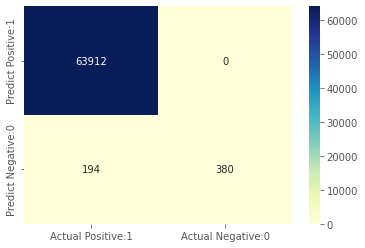

In [25]:
# Creamos nuestra Matriz de Confusión:
# COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
import seaborn as sns # statistical data visualization
%matplotlib inline
# import category_encoders as ce

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# Visualizamos la Matriz de Confusión:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
# El Informe de Clasificación es otra forma de evaluar el rendimiento del modelo de clasificación.
# Muestra las puntuaciones de precisión, recuperación, f1 y soporte para el modelo:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63912
           1       1.00      0.66      0.80       574

    accuracy                           1.00     64486
   macro avg       1.00      0.83      0.90     64486
weighted avg       1.00      1.00      1.00     64486



In [ ]:
# Generamos el modelo y especificando clusters e iteraciones:
n = 10  # Cantidad de clusters.
i = 10 # Cantidad de iteraciones.
kmeans = KMeans(n_clusters=n, n_init=i).fit(df_number_no_nan)

In [ ]:
# Agregamos al dataframe "clientes" una nueva columna con las etiquetas
# que KMeans asignó a cada cluster:
df_number_no_nan["cluster"] = kmeans.labels_

# Mostramos las etiquetas:
print ("Este es un array con las etiquetas de los clusters:\n ", kmeans.labels_)

Este es un array con las etiquetas de los clusters:
  [6 6 6 ... 4 4 4]


In [ ]:
# GUARDO DF EN CSV PARA SU POSTERIOR GRAFICACION
# df_number_no_nan.to_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/df_number_no_nan.csv', index=False)
df_number_no_nan

,Gravedad_victima,Clase_incidente,Edad,Num_dia,Hora,Anio,Radicado,Latitud,Longitud,Condicion2,Dia2,Sexo2,cluster
0,0,4,17,1.0,0,2014,1423940.0,6.266915,-75.559099,3,4,1,6
1,0,0,20,1.0,0,2014,1423921.0,6.289353,-75.553292,3,4,1,6
2,0,0,18,1.0,0,2014,1423921.0,6.289353,-75.553292,5,4,0,6
3,0,0,19,1.0,0,2014,1423849.0,6.234327,-75.607611,3,4,1,6
4,0,0,39,1.0,0,2014,1423849.0,6.234327,-75.607611,5,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235836,0,4,44,30.0,20,2021,1763939.0,6.298268,-75.585992,3,1,0,4
235837,0,2,38,30.0,20,2021,1763788.0,6.217895,-75.575824,3,1,0,4
235838,0,4,32,30.0,22,2021,1764135.0,6.234267,-75.536311,3,1,1,4
235839,0,4,29,30.0,22,2021,1764135.0,6.234267,-75.536311,0,1,0,4


In [ ]:
# Graficamos como queda nuestra agrupación y vemos el nro de clusters y
# el valor de la "Inercia", este último valor nos da una idea de que tan
# cercanos son los valores al centroide:

n_clusters = n
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown", "yellow"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(df_number_no_nan[df_number_no_nan["cluster"] == df_number_no_nan]['Condicion2'],
                df_number_no_nan[df_number_no_nan["cluster"] == df_number_no_nan]['Edad'],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en Caja de Ahorro (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de débito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del df_number_no_nan["cluster"] 

In [ ]:
# Estimación del número de Clusters (K) segun el Método del Codo:
range_n_clusters = range(2, 10)
inercias = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init=i).fit(df_cat_num2)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.title("Método del Codo:", fontsize=20)
plt.xlabel("Número de Clusters", fontsize=15)
plt.ylabel("Inercia", fontsize=15)
plt.show()


KeyboardInterrupt: ignored

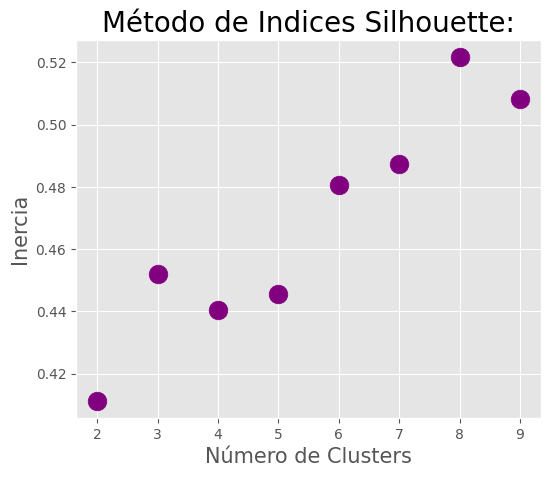

In [ ]:
# Estimación del número de Clusters (K) segun el Método de Indices Silhouette:
range_n_clusters = range(2, 10)
val_m_silhouette = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=50).fit(clientes) 
    cluster_labels = kmeans.fit_predict(clientes)
    silhouette_avg = silhouette_score(clientes, cluster_labels)
    val_m_silhouette.append(silhouette_avg)
    
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), val_m_silhouette, marker="o", s=180, color="purple")
plt.title("Método de Indices Silhouette:", fontsize=20)
plt.xlabel("Número de Clusters", fontsize=15)
plt.ylabel("Inercia", fontsize=15)
plt.show()

# CODIGO EN R:

In [ ]:
# Con esta sentencia Colab me permite corre código en R mientras anteponga en cada
# celda %%R:
%load_ext rpy2.ipython

In [ ]:
# Configuración de tamaño de gráficos:
%%R
options(repr.plot.width=5, repr.plot.height=4, scipen = 999)

In [ ]:
# Instalación y carga de paquetes necesarios:
%%R
list.of.packages <- c('ggplot2', 'ggthemes', 'R.matlab')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(ggplot2)
library(ggthemes)
library(R.matlab)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’


R[write to console]: trying URL 'https://cran.r-project.org/src/contrib/R.methodsS3_1.8.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 24131 bytes (23 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
cli_R <- data.frame( 
   
#  "saldo" = c(50000, 45000, 48000, 43500, 47000, 52000, 20000, 26000, 25000, 23000, 21400, 18000, 8000, 12000, 6000, 14500, 12600, 7000, 36000, 34500, 31800, 55000, 33200, 56700, 9000, 19600, 10100, 5950, 24000, 16500),

#  "transacciones" = c(25, 20, 16, 23, 25, 18, 23, 22, 24, 21, 27, 18, 8, 3, 6, 4, 9, 23, 20, 11, 7, 18, 20, 17, 19, 16, 15, 21, 14, 13)

   "saldo" = c(0.867980, 0.769458, 0.828571, 0.739901, 0.808867,       
               0.907389, 0.276847, 0.395074, 0.375369, 0.335961,       
               0.304433, 0.237438, 0.040394, 0.119212, 0.000985,       
               0.168473, 0.131034, 0.020690, 0.592118, 0.562562,       
               0.509360, 0.966502, 0.536946, 1.000000, 0.060099,       
               0.268966, 0.081773, 0.000000, 0.355665, 0.207882),
   "transacciones" = c(0.916667, 0.708333, 0.541667, 0.833333, 0.916667,
                       0.625000, 0.833333, 0.791667, 0.875000, 0.750000, 
                       1.000000, 0.625000, 0.208333, 0.000000, 0.125000,
                       0.041667, 0.250000, 0.833333, 0.708333, 0.333333,
                       0.166667, 0.625000, 0.708333, 0.583333, 0.666667,
                       0.541667, 0.500000, 0.750000, 0.458333, 0.416667)
)
cli_R

      saldo transacciones
1  0.867980      0.916667
2  0.769458      0.708333
3  0.828571      0.541667
4  0.739901      0.833333
5  0.808867      0.916667
6  0.907389      0.625000
7  0.276847      0.833333
8  0.395074      0.791667
9  0.375369      0.875000
10 0.335961      0.750000
11 0.304433      1.000000
12 0.237438      0.625000
13 0.040394      0.208333
14 0.119212      0.000000
15 0.000985      0.125000
16 0.168473      0.041667
17 0.131034      0.250000
18 0.020690      0.833333
19 0.592118      0.708333
20 0.562562      0.333333
21 0.509360      0.166667
22 0.966502      0.625000
23 0.536946      0.708333
24 1.000000      0.583333
25 0.060099      0.666667
26 0.268966      0.541667
27 0.081773      0.500000
28 0.000000      0.750000
29 0.355665      0.458333
30 0.207882      0.416667


In [ ]:
# Exploración de datos:
%%R
str(cli_R)
head(cli_R)

'data.frame':	30 obs. of  2 variables:
 $ saldo        : num  0.868 0.769 0.829 0.74 0.809 ...
 $ transacciones: num  0.917 0.708 0.542 0.833 0.917 ...
     saldo transacciones
1 0.867980      0.916667
2 0.769458      0.708333
3 0.828571      0.541667
4 0.739901      0.833333
5 0.808867      0.916667
6 0.907389      0.625000


In [ ]:
# Visualización

# Gráfico de dispersión:
%%R
ggplot(cli_R, aes(x = cli_R.saldo, y = cli_R.transacciones)) + geom_point() + ggtitle('Gráfico de dispersión del dataset') + theme_tufte() + geom_rangeframe()

R[write to console]: Error in FUN(X[[i]], ...) : object 'cli_R.saldo' not found



RRuntimeError: ignored

In [ ]:
# Inicializamos la cantidad de centroides y sus posiciones:
%%R
K <- 3

initial_centroids <- matrix(c(3, 3, 6, 2, 8 , 5), ncol = 2)
initial_centroids

     [,1] [,2]
[1,]    3    2
[2,]    3    8
[3,]    6    5


In [ ]:
# Agregamos los centroides iniciales a nuestro gráfico:
%%R
temp_centroids <- as.data.frame(initial_centroids)
names(temp_centroids) <- c('X.1', 'X.2')

ggplot(X, aes(x = X.1, y = X.2)) + geom_point() + ggtitle('Datos con centroides iniciales') + theme_tufte() + geom_rangeframe() +
    geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'red')

R[write to console]: Error in ggplot(X, aes(x = X.1, y = X.2)) : object 'X' not found




Error in ggplot(X, aes(x = X.1, y = X.2)) : object 'X' not found


RInterpreterError: ignored

In [ ]:
# Ahora tenemos que encontrar el centroide más cercano para cada observación en X:
%%R
findClosestCentroids <- function(X, centroids) {
    
    K <- nrow(centroids)
    m <- nrow(X)
    
    idx <- rep(0, m)
    
    for(i in 1:m) {
        
        d_min <- 99999999
        
        for(j in 1:K) {
            
            distance <- (sum((X[i,] - centroids[j,]) ^ 2)) ^ (1/2)
            
            if(distance < d_min) {
                d_min <- distance
                idx[i] <- j
            }
        }
    }
    
    return(idx)
    
}


idx <- findClosestCentroids(X, initial_centroids)

R[write to console]: Error in nrow(X) : object 'X' not found




Error in nrow(X) : object 'X' not found


RInterpreterError: ignored

In [ ]:
# Graficamos los puntos teniendo en cuenta la primera asignación de centroides (en azul)
# para las observaciones.

In [ ]:
# El siguiente paso es mover los centroides de tal forma que sean igual al promedio de los
# puntos que agrupa.
%%R
computeCentroids <- function(X, idx, K) {
    
    m <- nrow(X)
    n <- ncol(X)
    idx <- as.numeric(idx)
    
    centroids <- matrix(rep(0, K * n), ncol = n, nrow = K)
    
    for(i in 1:K) {
        
        idx_X <- which(idx %in% i)
        
        centroids[i,] <- colMeans(X[idx_X,])
    }
    
    return(centroids)
}

centroids <- computeCentroids(X, idx, K)

R[write to console]: Error in nrow(X) : object 'X' not found




Error in nrow(X) : object 'X' not found


RInterpreterError: ignored

In [ ]:
# Nuevas posiciones de los centroides:
%%R
centroids

In [ ]:
# Graficamos las nuevas posiciones de los centroides:
%%R
temp_centroids <- as.data.frame(centroids)
names(temp_centroids) <- c('X.1', 'X.2')

gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
        geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'blue') +
        ggtitle('Ejemplo datos para clustering') + 
        theme_tufte()

gg

In [ ]:
# Ahora que sabemos como funciona el algoritmo lo utilizaremos con varias iteraciones

# Inicializamos algunos parámetros:
%%R
K <- 3
max_iters <- 10
initial_centroids <- matrix(c(3, 3, 6, 2, 8 , 5), ncol = 2)

runkMeans <- function(X, initial_centroids, max_iters) {
    
    m <- nrow(X)
    n <- ncol(X)
    
    K <- nrow(initial_centroids)
    centroids <- initial_centroids
    idx <- rep(0, m)
    
    for(i in 1:max_iters) {
        
        idx <- findClosestCentroids(X, centroids)
        centroids <- computeCentroids(X, idx, K)
        
    }
    
    return(list(centroids = centroids, idx = idx))
    
}

results <- runkMeans(X, initial_centroids, max_iters)
centroids <- results[[1]]
idx <- results[[2]]

In [ ]:
# Graficamos los clusters y centroides resultantes luego de 10 iteraciones:
%%R
temp_centroids <- as.data.frame(centroids)
names(temp_centroids) <- c('X.1', 'X.2')

gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
        geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'blue') +
        ggtitle('Ejemplo datos para clustering') + 
        theme_tufte()

gg

In [ ]:
# También podemos almacenar los valores historicos de los centroides y ver como se
# fueron "moviendo".
# En el siguiente caso los centroides iniciales serán iguales a puntos al azar en
# nuestros datos. Por otro lado aumentaremos el número de iteraciones.
# Inicializamos algunos parámetros:
%%R
K <- 3
max_iters <- 50

set.seed(123)
index <- sample(1:nrow(X), 3)
initial_centroids <- as.matrix(X[index,])

runkMeans <- function(X, initial_centroids, max_iters) {
    
    m <- nrow(X)
    n <- ncol(X)
    
    K <- nrow(initial_centroids)
    centroids <- initial_centroids
    idx <- rep(0, m)
    c1_hist <- centroids[1,]
    c2_hist <- centroids[2,]
    c3_hist <- centroids[3,]
    
    for(i in 1:max_iters) {
        
        idx <- findClosestCentroids(X, centroids)
        centroids <- computeCentroids(X, idx, K)
        c1_hist <- rbind(c1_hist, centroids[1,])
        c2_hist <- rbind(c2_hist, centroids[2,])
        c3_hist <- rbind(c3_hist, centroids[3,])
        
    }
    
    return(list(centroids = centroids, idx = idx, c1_hist = c1_hist, c2_hist = c2_hist, c3_hist = c3_hist))
    
}

In [ ]:
#Ejecutamos el algoritmo de clustering:
%%R
results <- runkMeans(X, initial_centroids, max_iters)

cat("Posiciones iniciales de centroides:\n")
initial_centroids

cat("Posiciones finales de centroides:\n")
centroids <- as.data.frame(results$centroids)
names(centroids) <- c('X.1', 'X.2')
centroids

In [ ]:
# Preparamos los datos y graficamos:
#Ejecutamos el algoritmo de clustering:
%%R
results <- runkMeans(X, initial_centroids, max_iters)

cat("Posiciones iniciales de centroides:\n")
initial_centroids

cat("Posiciones finales de centroides:\n")
centroids <- as.data.frame(results$centroids)
names(centroids) <- c('X.1', 'X.2')
centroids
plotKmeans <- function() {

        idx <- results$idx
                
        c1_pos <- as.data.frame(results$c1_hist)
        names(c1_pos) <- c('X.1', 'X.2')

        c2_pos <- as.data.frame(results$c2_hist)
        names(c2_pos) <- c('X.1', 'X.2')

        c3_pos <- as.data.frame(results$c3_hist)
        names(c3_pos) <- c('X.1', 'X.2')

        gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
                
                geom_point(data = c1_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c1_pos, aes(x = X.1, y = X.2), col = "blue") +

                geom_point(data = c2_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c2_pos, aes(x = X.1, y = X.2), col = "blue") +

                geom_point(data = c3_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c3_pos, aes(x = X.1, y = X.2), col = "blue") +

                ggtitle('Movimientos de centroides') + 
                theme_tufte()

        gg
    }

plotKmeans() + ggtitle("Resultado del algoritmo k-means")

In [ ]:
# Para el siguiente caso podemos ver como el algoritmo se queda en un minimo local,
# es decir, reasignar cualquier punto a un nuevo cluster incrementaría la distancia
# total entre puntos y centroides, pero se puede llegar a una mejor solución si se 
# inicializa de manera diferente los centroides.

#Ejecutamos el algoritmo de clustering:
%%R
results <- runkMeans(X, initial_centroids, max_iters)

cat("Posiciones iniciales de centroides:\n")
initial_centroids

cat("Posiciones finales de centroides:\n")
centroids <- as.data.frame(results$centroids)
names(centroids) <- c('X.1', 'X.2')
centroidsK <- 3
max_iters <- 30
initial_centroids <- as.matrix(X[c(100,200,300),])

In [ ]:
#Graficamos:
%%R
plotKmeans() + ggtitle('Ejemplo de mínimo local')

Algoritmos comparables para clustering:

- K-medoids
- Hierarchical clustering
- Aglomerativo
- DIANA (DIvisive ANAlysis Clustering)
- Dendrograma
- Density based clustering (DBSCAN)
- Gaussian mixture models (GMMs)

Limitaciones del clustering


El clustering puede ser una herramienta muy útil para encontrar agrupaciones en los datos, sobre todo a medida que el volumen de los mismos aumenta. Sin embargo, es importante recordar sus limitaciones o problemas que pueden surgir al aplicarlo. Algunas de ellas son:

- Pequeñas decisiones pueden tener grandes consecuencias:a la hora de utilizar los métodos de clustering se tienen que tomar decisiones que influyen en gran medida en los resultados obtenidos. No existe una única respuesta correcta, por lo que en la práctica se prueban diferentes opciones.

- Escalado y centrado de las variables

- Qué medida de distancia/similitud emplear

- Número de clusters

- Tipo de linkage empleado en hierarchical clustering

- A que altura establecer el corte de un dendrograma

- Validación de los clusters obtenidos: no es fácil comprobar la validez de los resultados ya que en la mayoría de escenarios se desconoce la verdadera agrupación.

- Falta de robustez: los métodos de K-means-clustering e hierarchical clustering asignan obligatoriamente cada observación a un grupo. Si existe en la muestra algún outlier, a pesar de que realmente no pertenezca a ningún grupo, el algoritmo lo asignará a uno de ellos provocando una distorsión significativa del cluster en cuestión. Algunas alternativas son k-medoids y DBSCAN.

- La naturaleza del algoritmo de hierarchical clustering conlleva que, si se realiza una mala división en los pasos iniciales, no se pueda corregir en los pasos siguientes. 



